<a href="https://colab.research.google.com/github/Student-PIAIC/Agectic_AI/blob/main/Fine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q google-generativeai

In [2]:
import google.generativeai as genai

In [4]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY_2'))

In [5]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

In [6]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [14]:
import random
name = f'generate-number452-{random.randint(0, 100)}'
operation = genai.create_tuned_model(
source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '6',
        },{
             'text_input': '-3',
             'output': '-6',
        },{
             'text_input': 'twenty two',
             'output': 'fourty four',
        },{
             'text_input': 'two hundred',
             'output': 'four hundred',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred and ninety eight',
        },{
             'text_input': '8',
             'output': '16',
        },{
             'text_input': '-98',
             'output': '-196',
        },{
             'text_input': '1,000',
             'output': '2,000',
        },{
             'text_input': '10,100,000',
             'output': '20,100,000',
        },{
             'text_input': 'thirteen',
             'output': 'twenty six',
        },{
             'text_input': 'eighty',
             'output': 'one hundred and sixty',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'six',
        },{
             'text_input': 'seven',
             'output': 'fourteen',
        }
    ],
    id = name,
    epoch_count = 10,
    batch_size=4,
    learning_rate=0.001,)

In [17]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-number452-52',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2025, 2, 1, 10, 57, 57, 487832, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 2, 1, 10, 59, 39, 874661, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 2, 1, 10, 57, 59, 135727, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2025, 2, 1, 10, 59, 39, 874661, tzinfo=datetime.timezone.utc),
                                  snapshots=[...],
                                  hyperparameters=Hyperparameters(epoch_count=10,
                                                                  

In [18]:
model.state

<State.ACTIVE: 2>

In [19]:
operation.metadata

tuned_model: "tunedModels/generate-number452-52"
total_steps: 38

In [20]:
import time

for status in operation.wait_bar():
  time.sleep(10)

  0%|          | 0/38 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

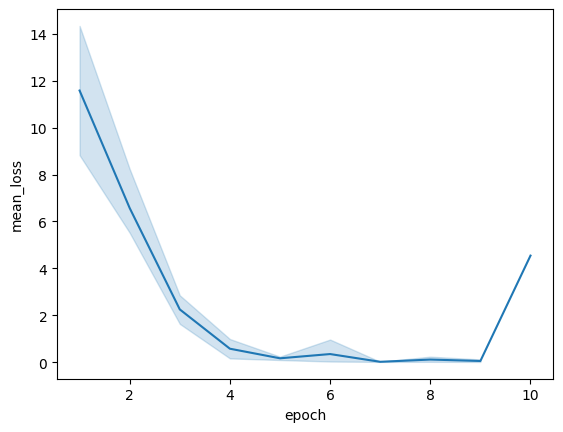

In [21]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

# **Evaluate your model**
You can use the genai.generate_content method and specify the name of your model to test your model performance

In [22]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [23]:
result = model.generate_content('5')
result.text

'10'

In [24]:
result = model.generate_content('four')
result.text

'eight'

In [26]:
result = model.generate_content('quatre')
result.text

'huit'

In [27]:
result = model.generate_content('III')
result.text

'VI'

In [28]:
result = model.generate_content('七')
result.text

'十四'

In [32]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is double the number Model"});

In [33]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is double the number Model'